# Problem 1
- 1.1  
I think there are 5 clusters. 2 from up left then 3 from bottom right
- 1.2  
for k=2, onlu k++ has differnet output, for k=5 and k=20, each different initialization has different output.
- 1.4  
Kmeans have different clusters with different center, for agglomerative clustering with complete link,  
the center point of clusters are very similar.
Both Kmeans and agglomerative performance scale with num of k

# Statement of Collaboration  
i have no teammates and did not discuss with anyone else.


<IPython.core.display.Javascript object>


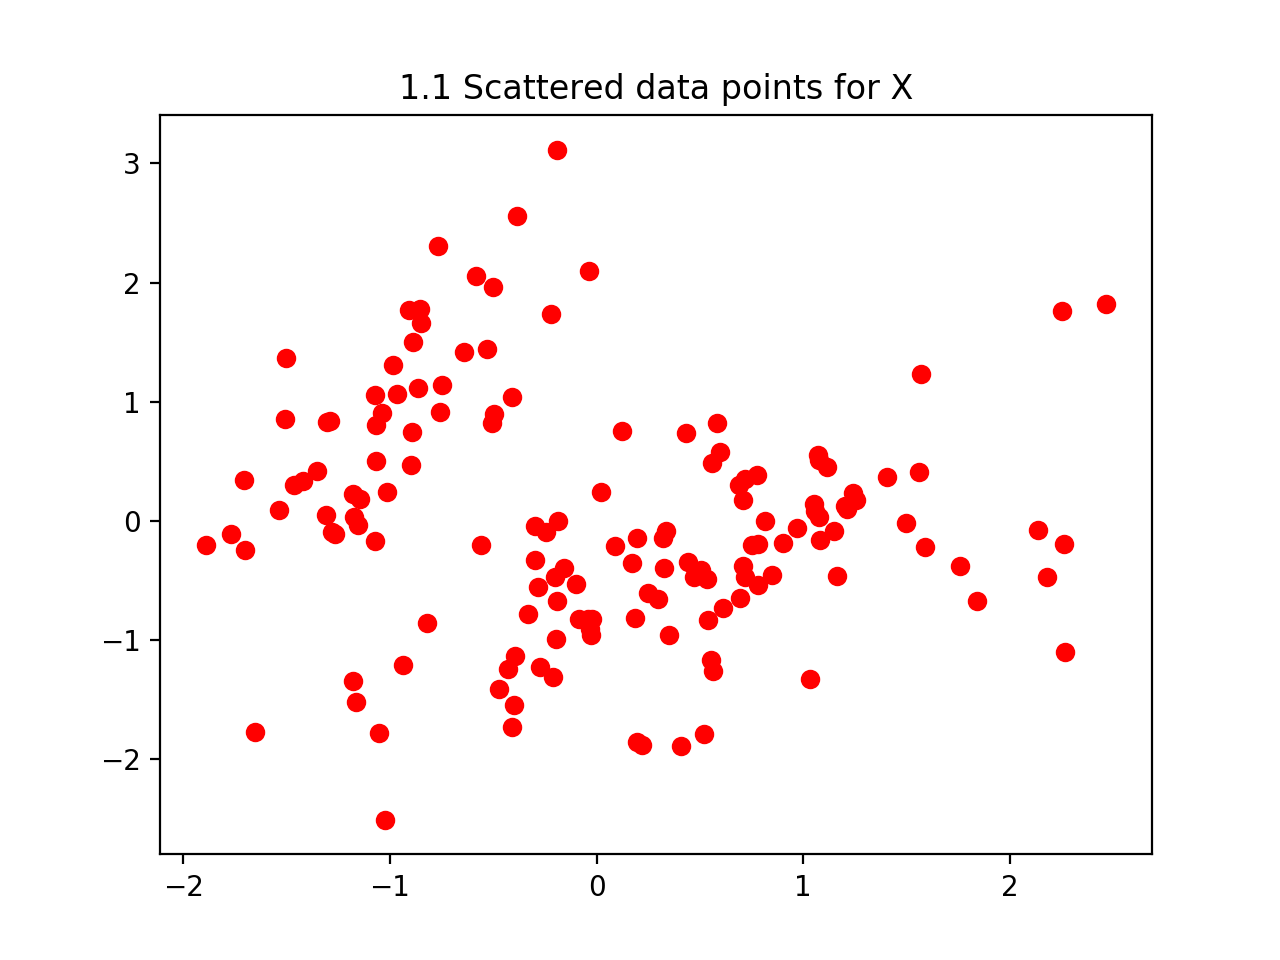

<IPython.core.display.Javascript object>


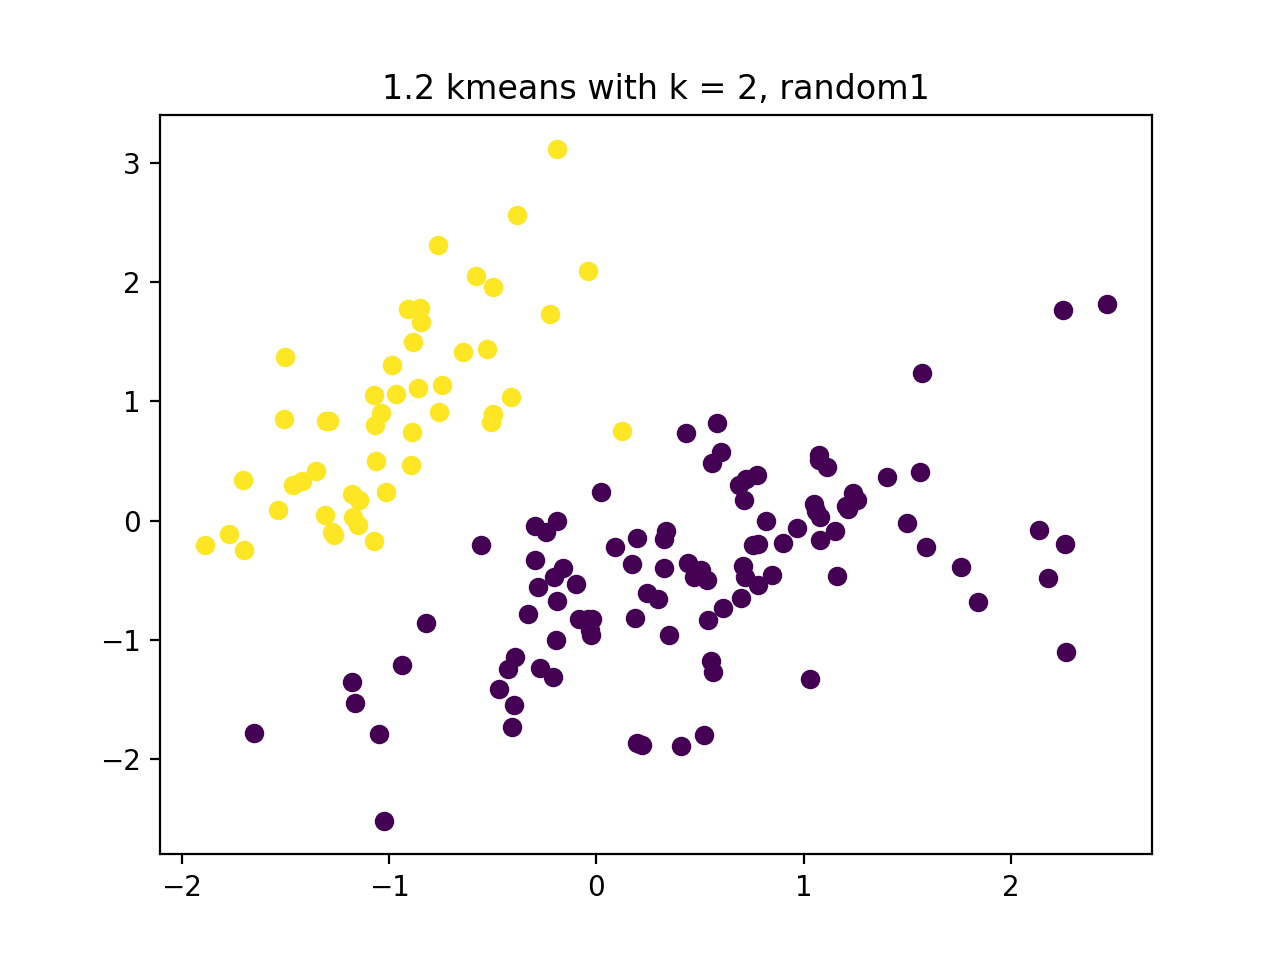

<IPython.core.display.Javascript object>


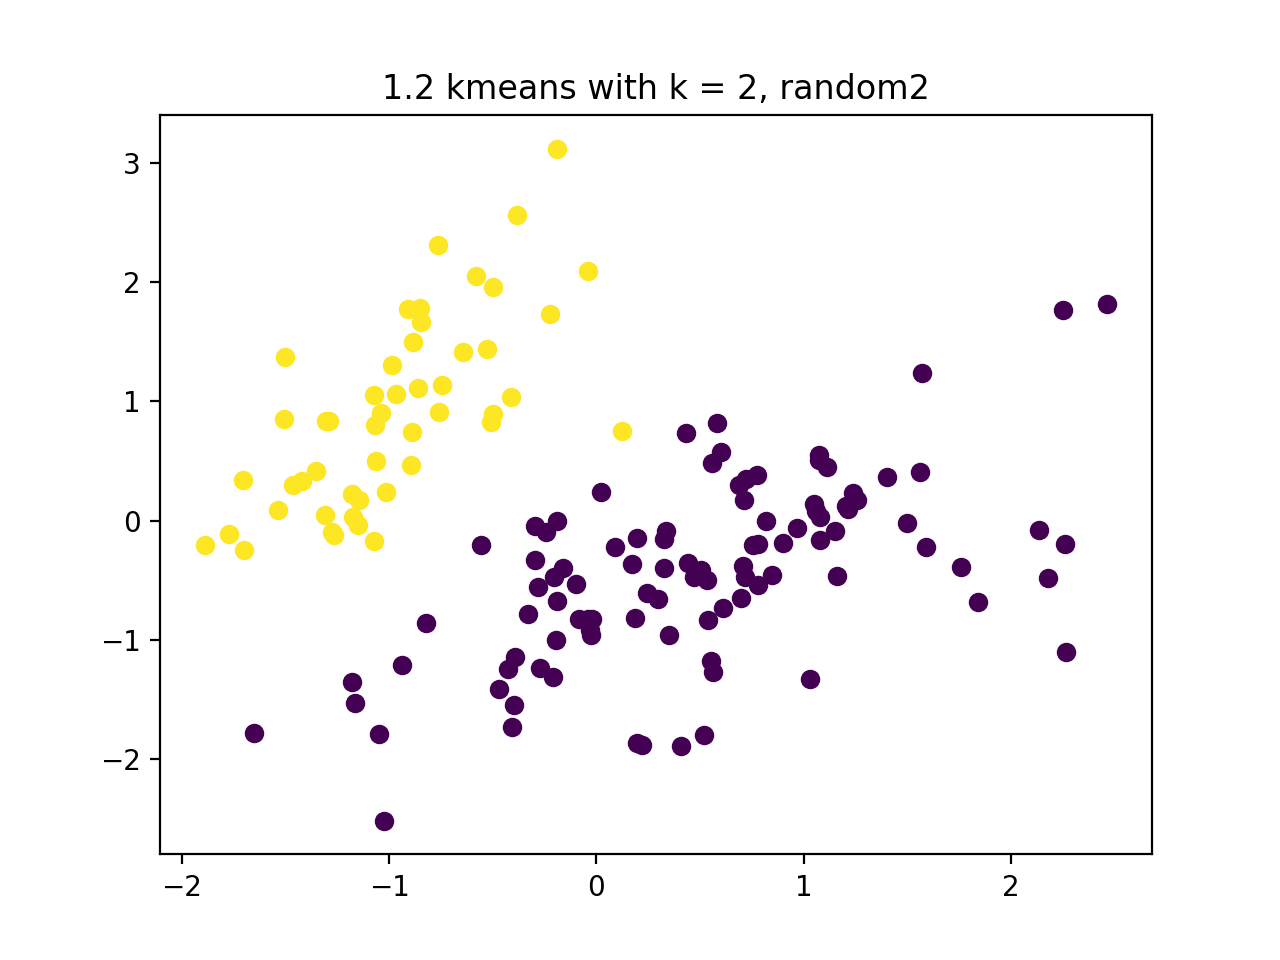

<IPython.core.display.Javascript object>


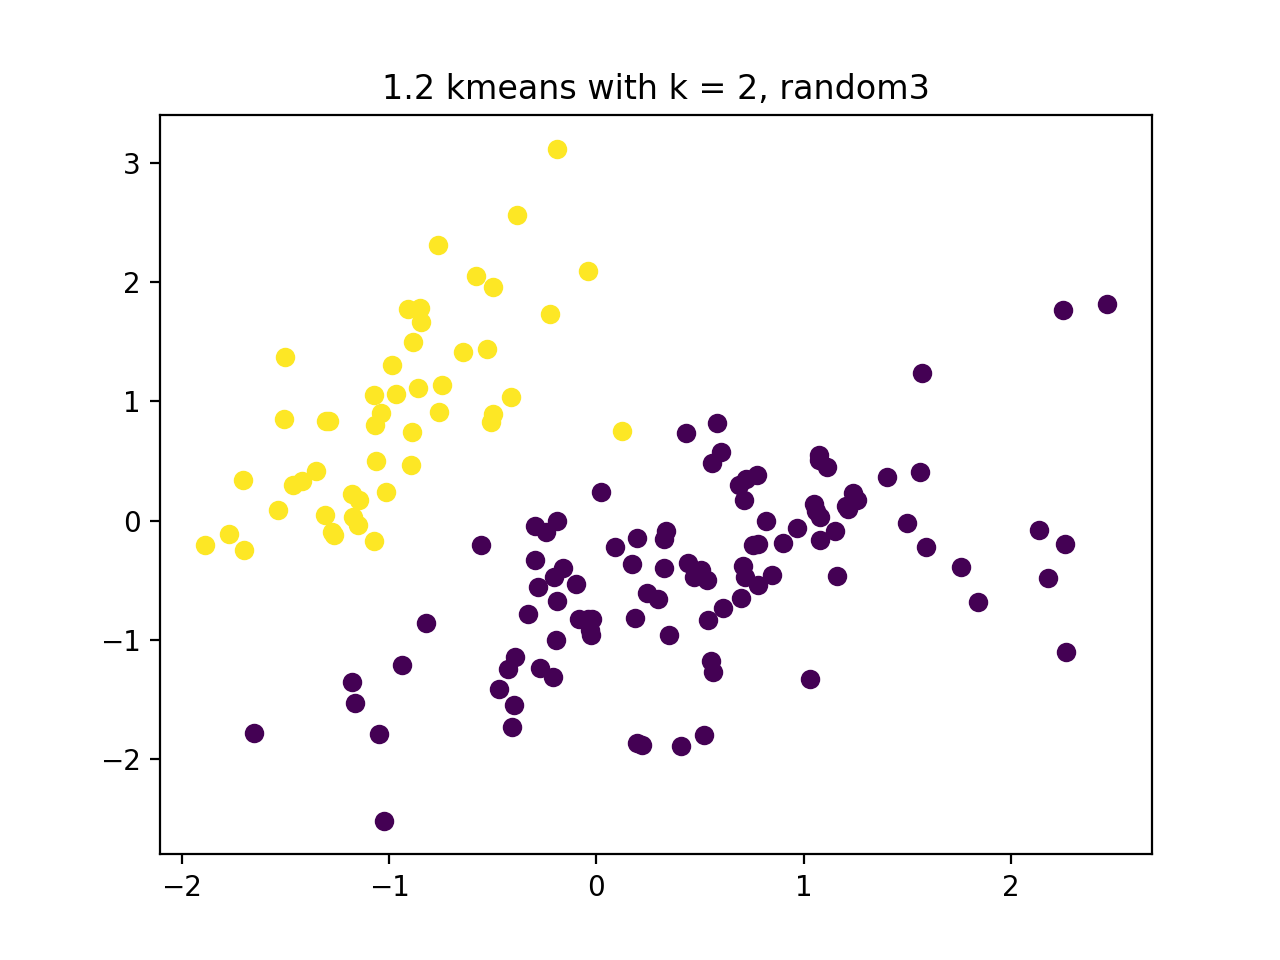

<IPython.core.display.Javascript object>


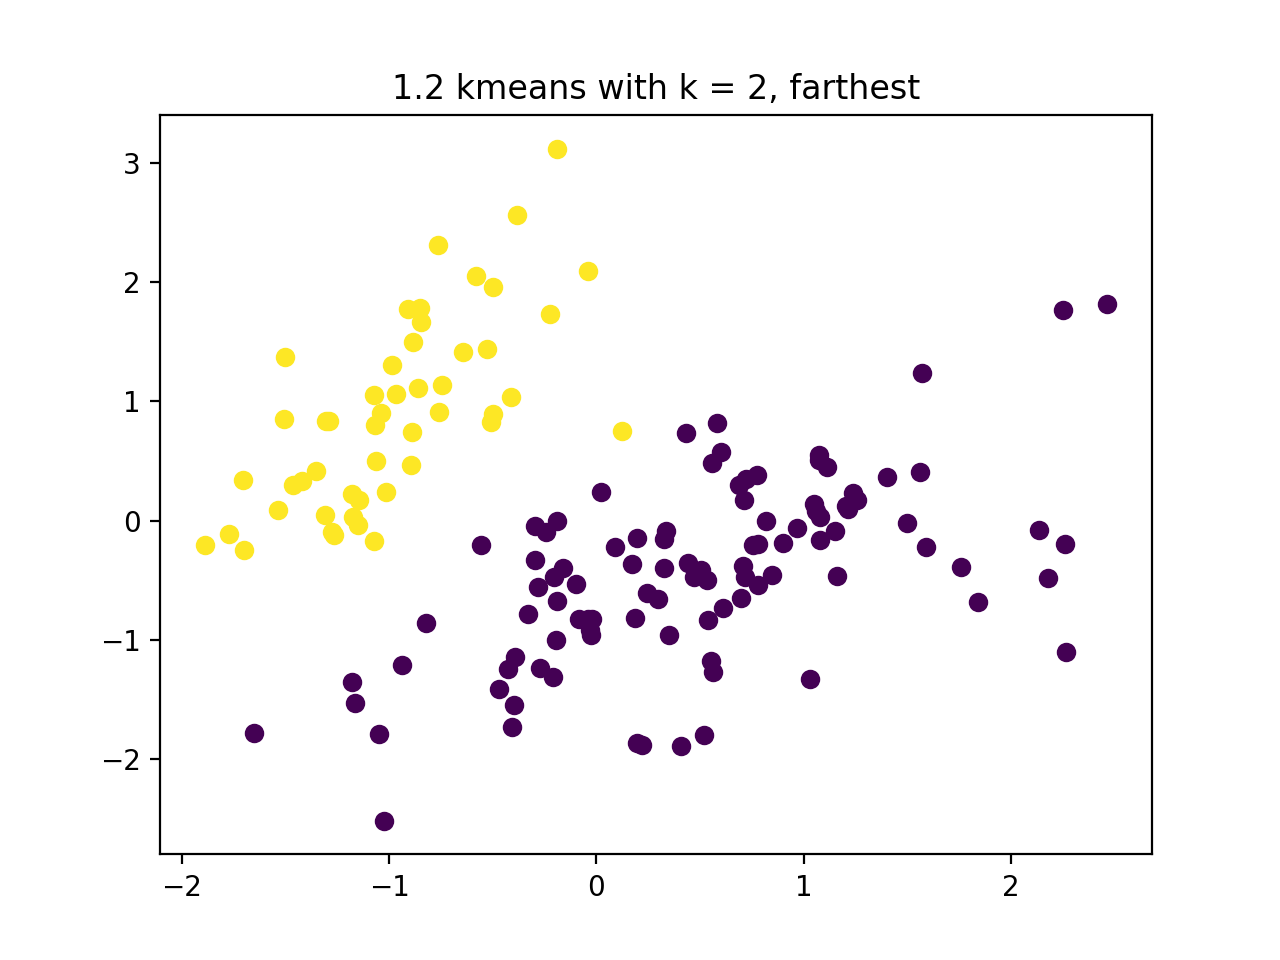

<IPython.core.display.Javascript object>


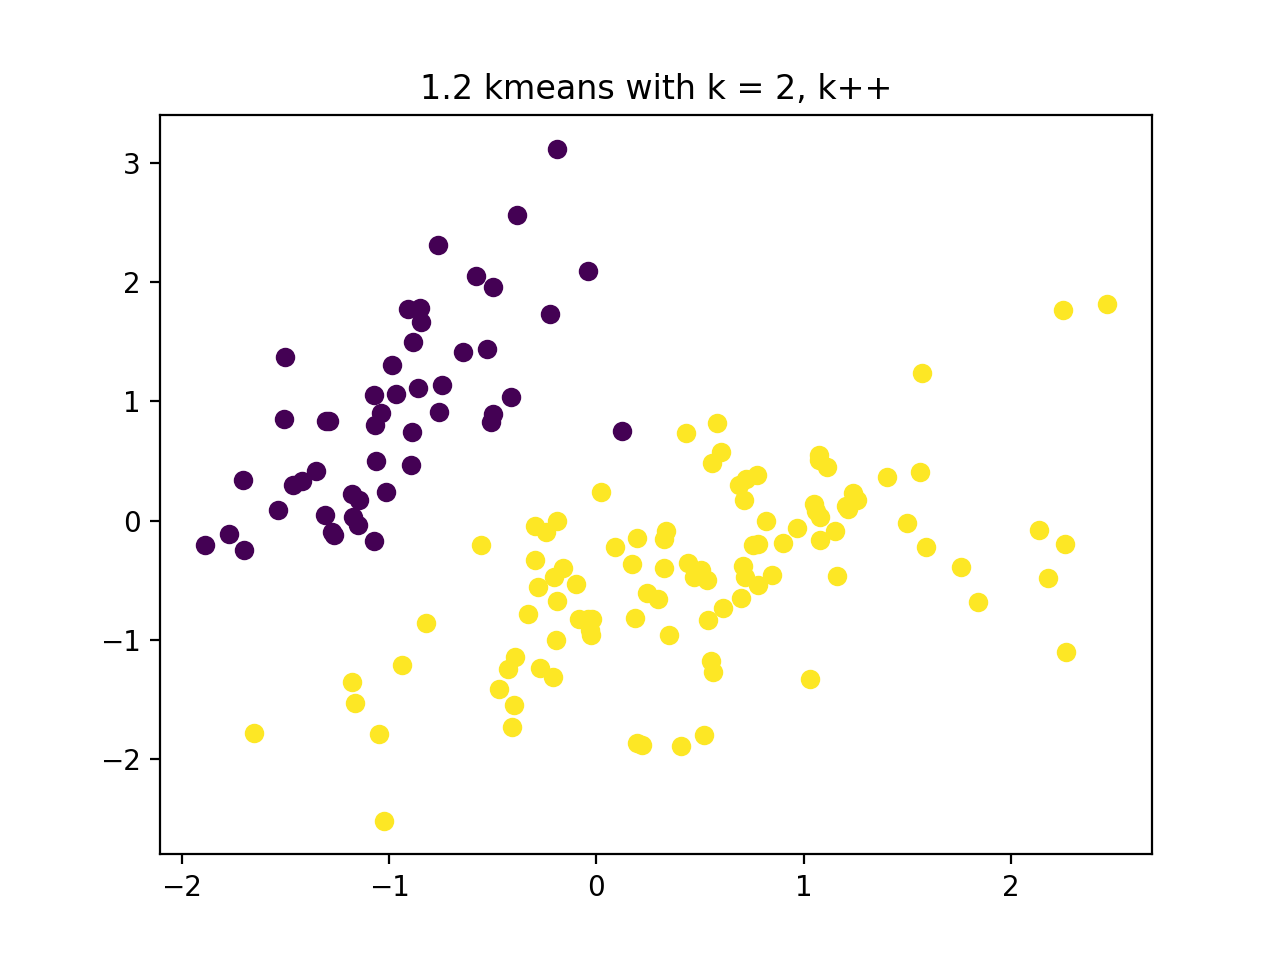

<IPython.core.display.Javascript object>


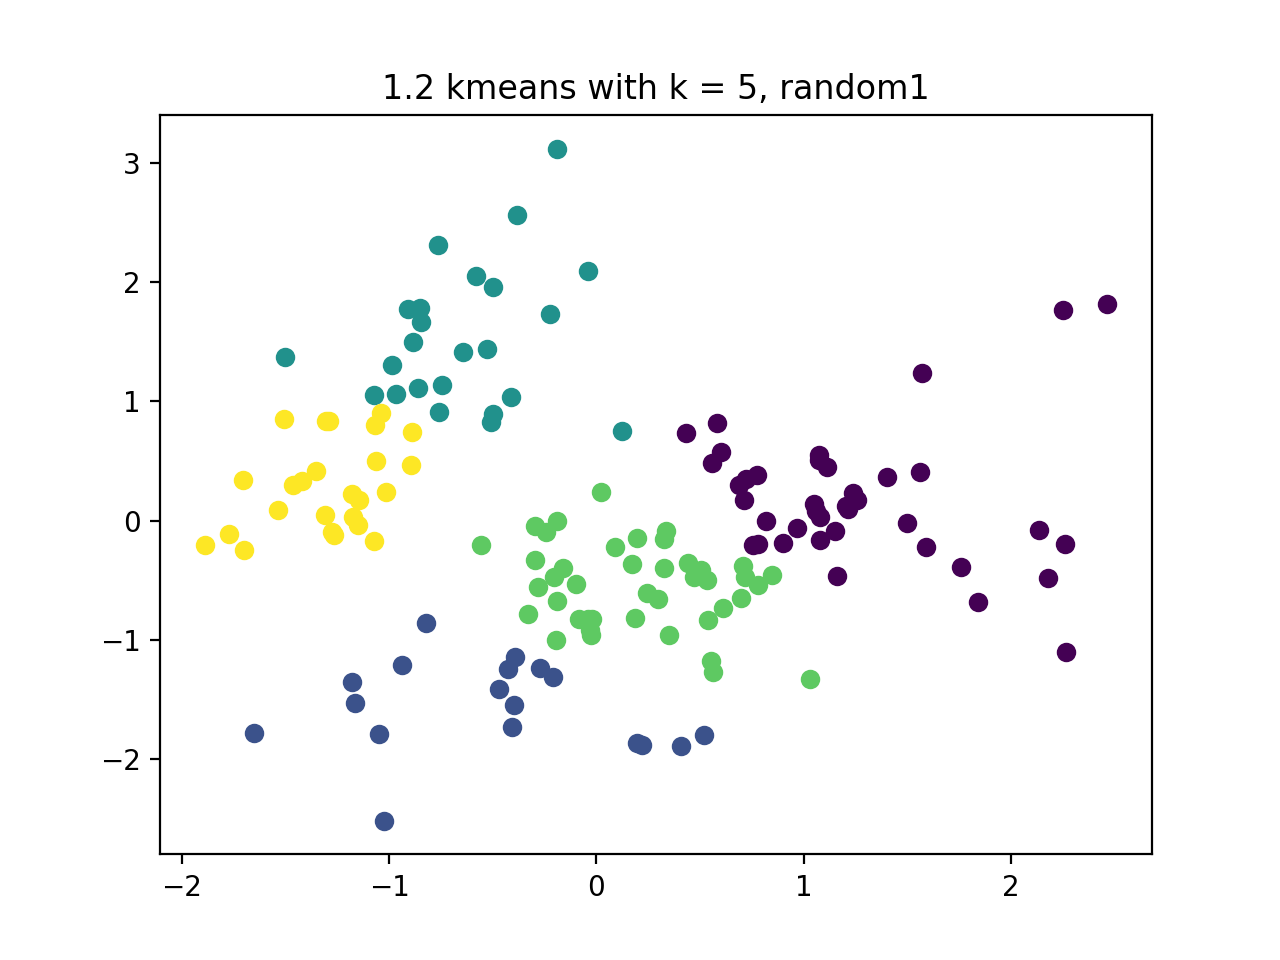

<IPython.core.display.Javascript object>


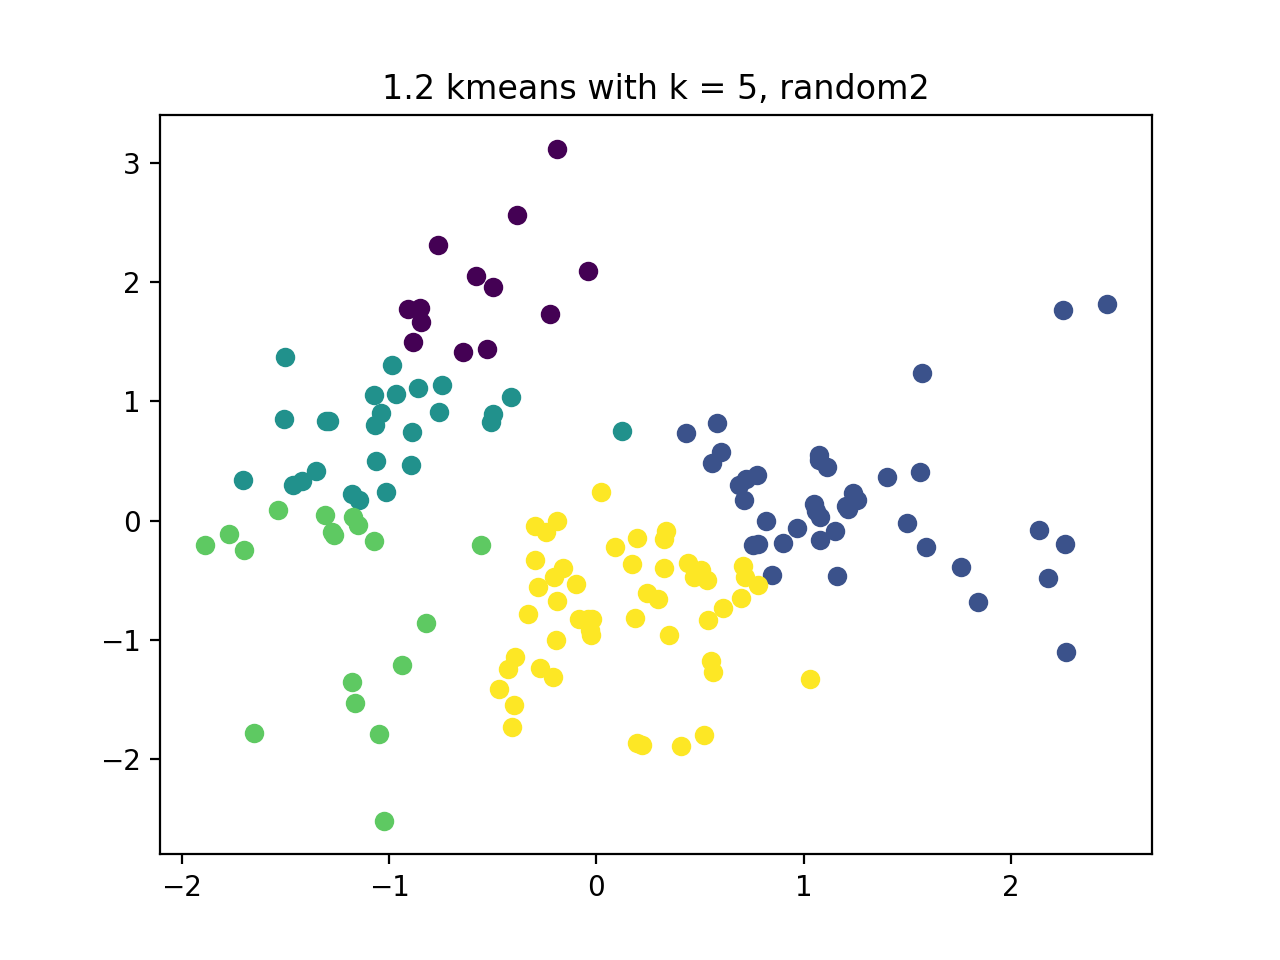

<IPython.core.display.Javascript object>


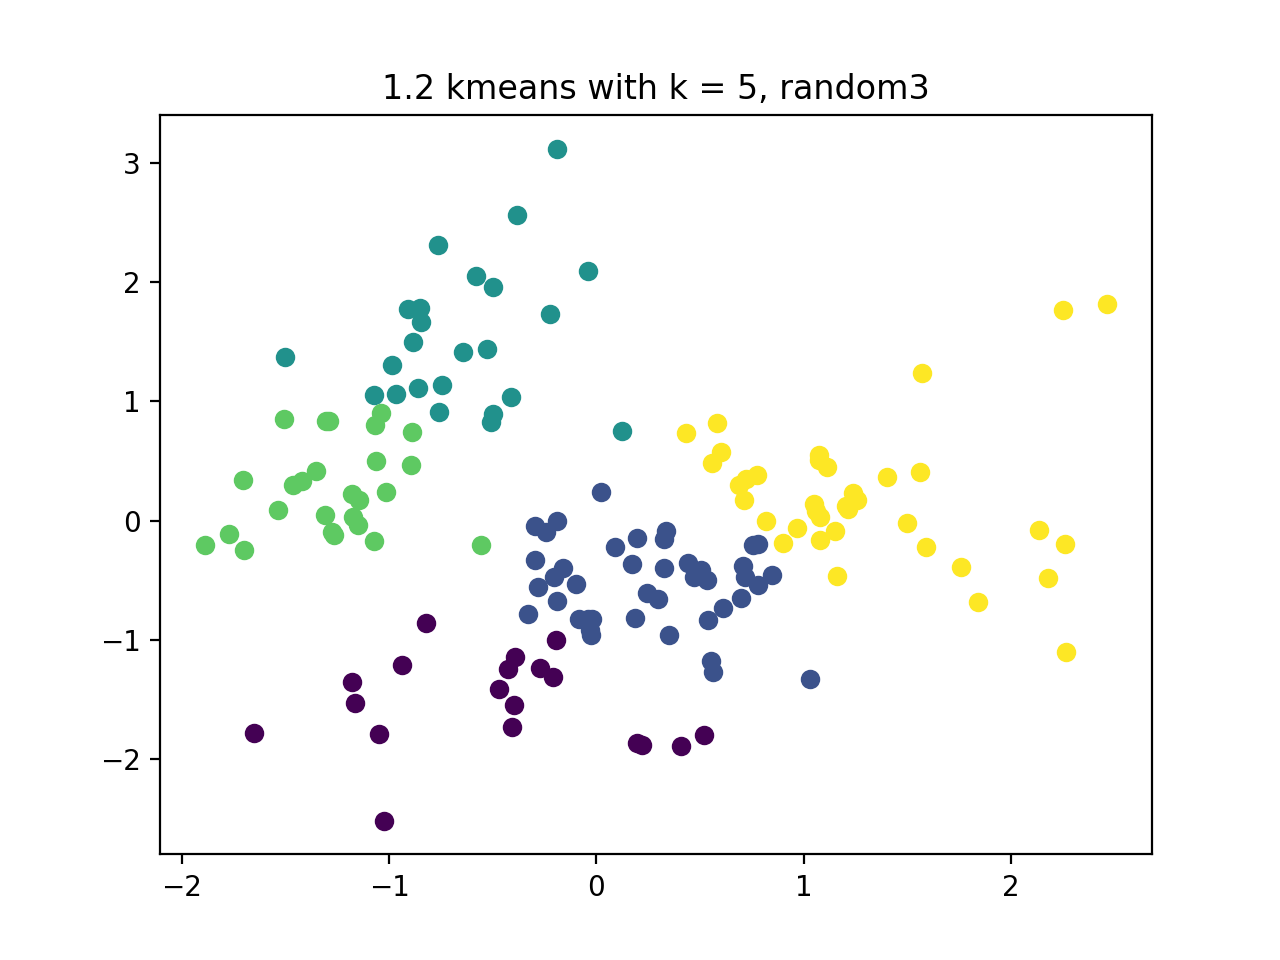

<IPython.core.display.Javascript object>


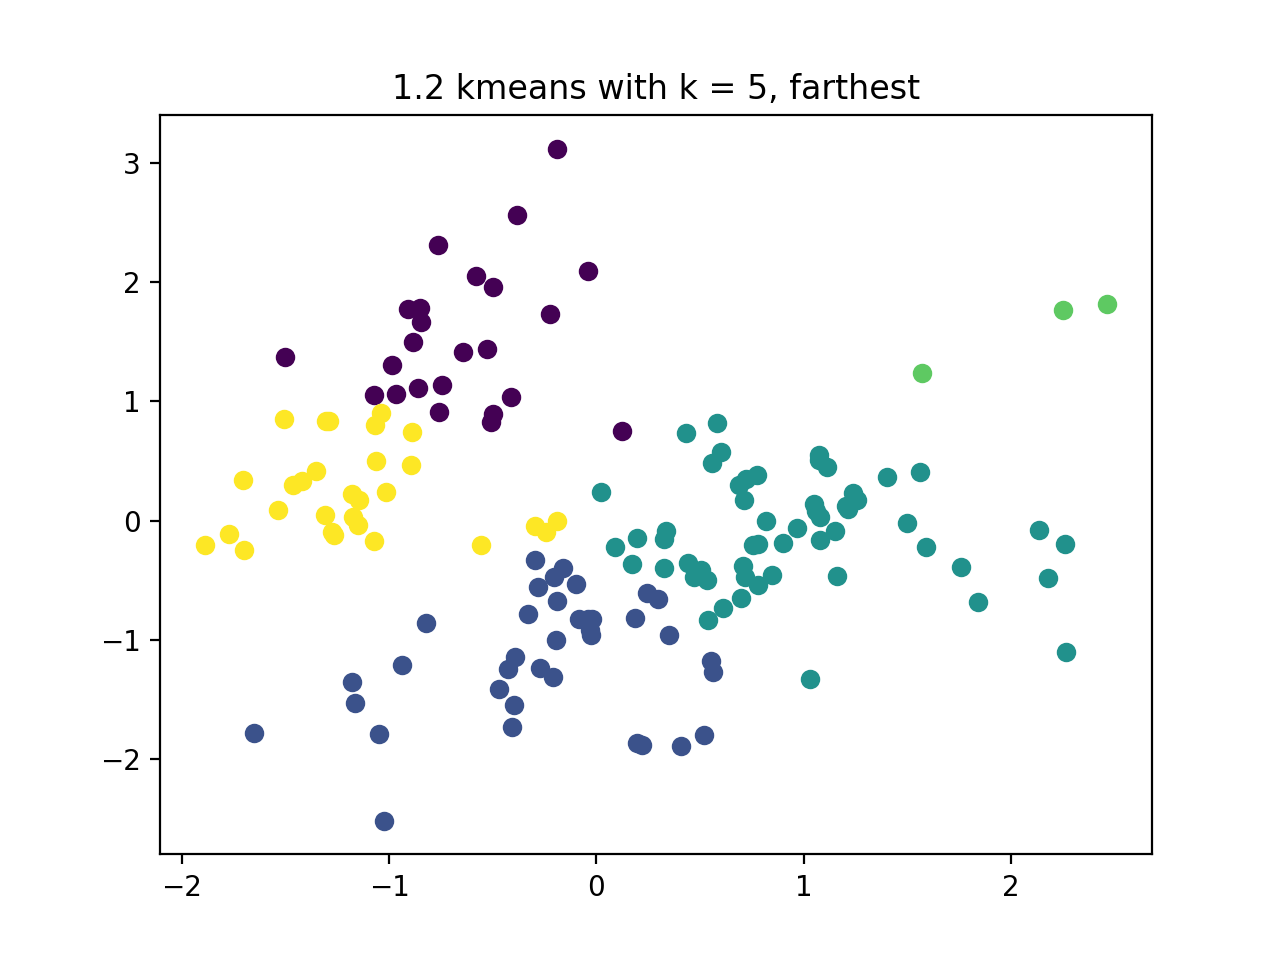

<IPython.core.display.Javascript object>


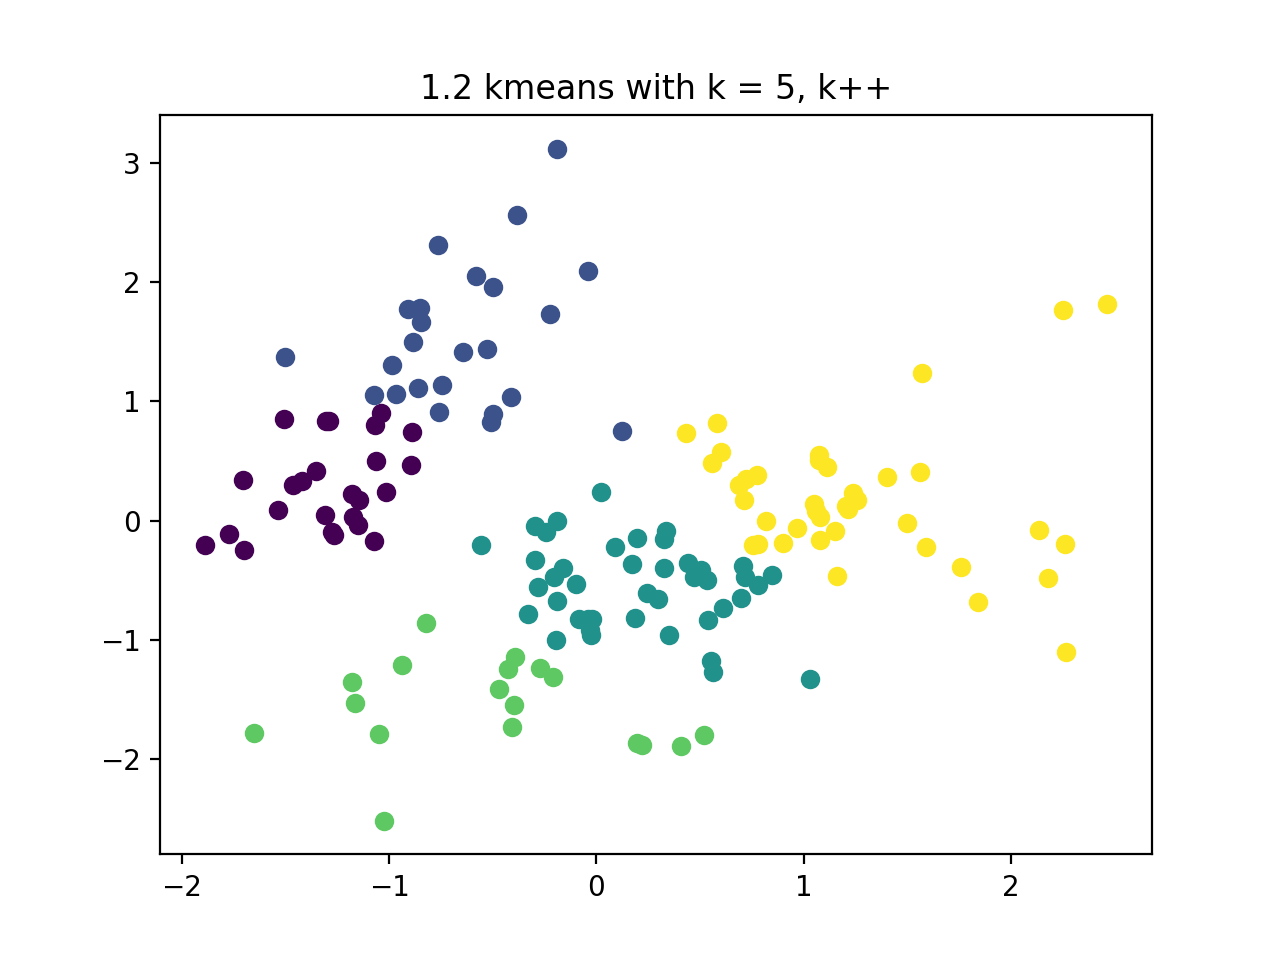

<IPython.core.display.Javascript object>


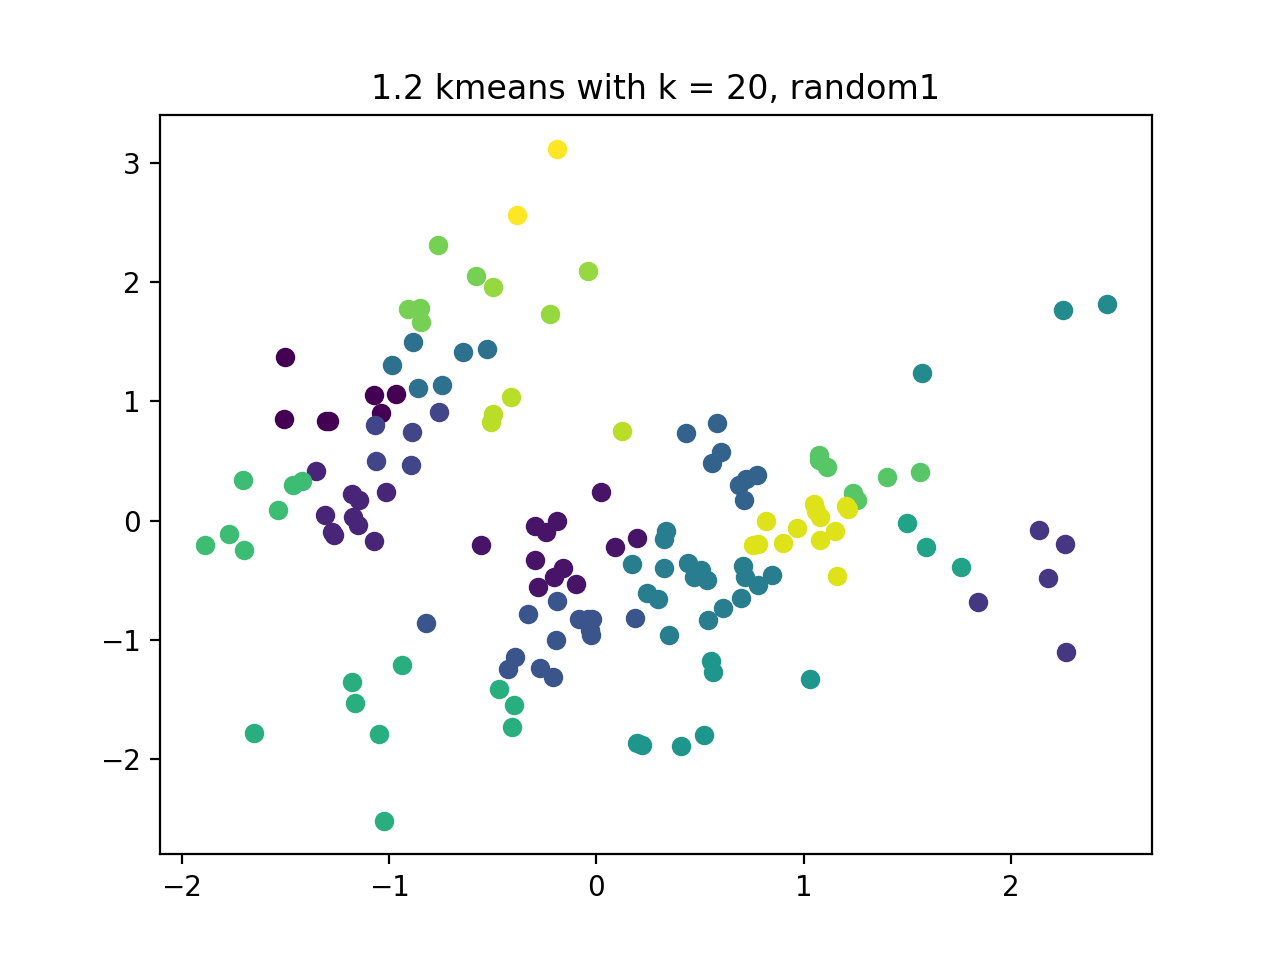

<IPython.core.display.Javascript object>


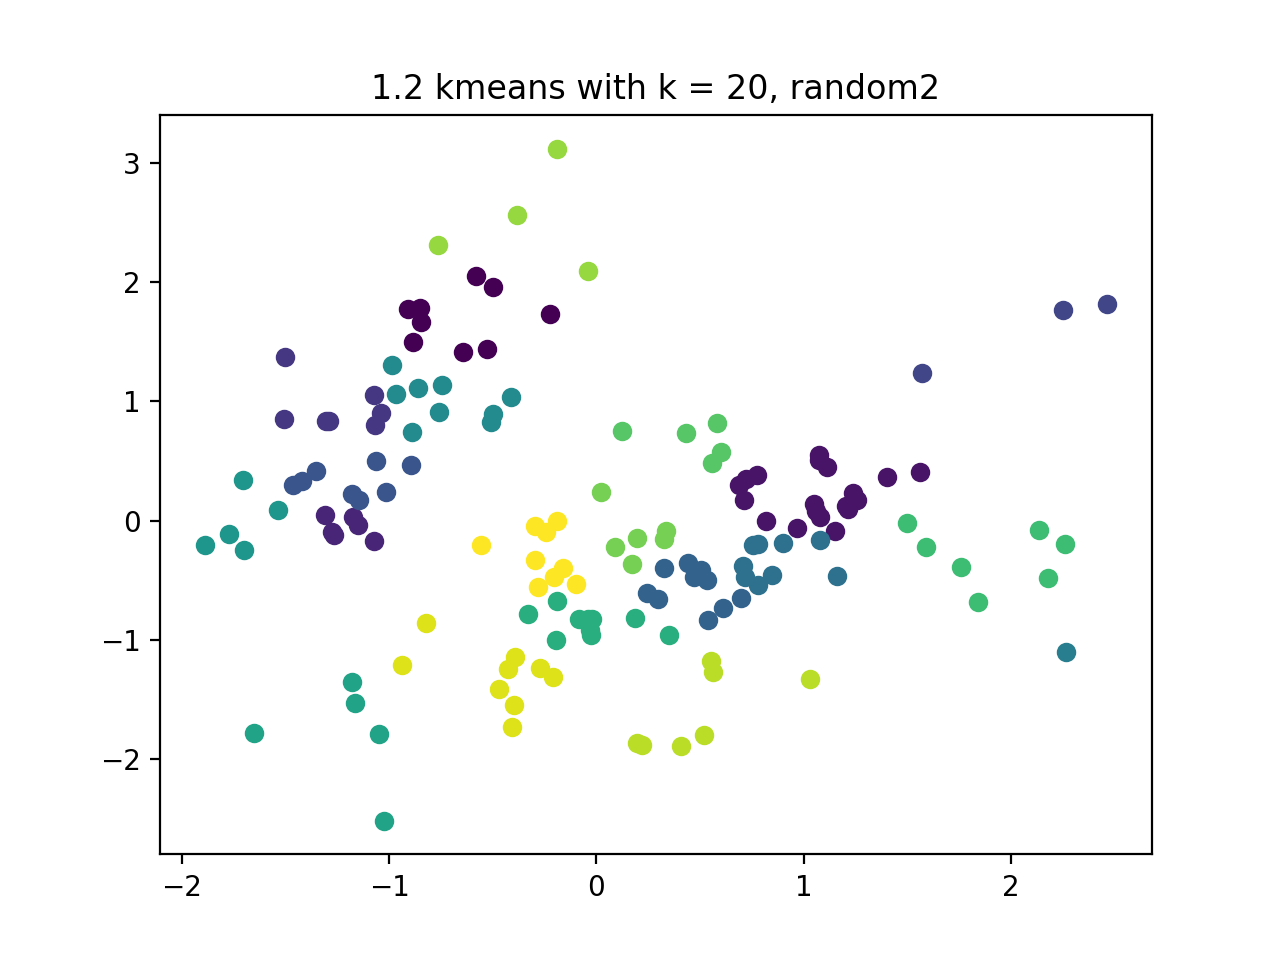

<IPython.core.display.Javascript object>


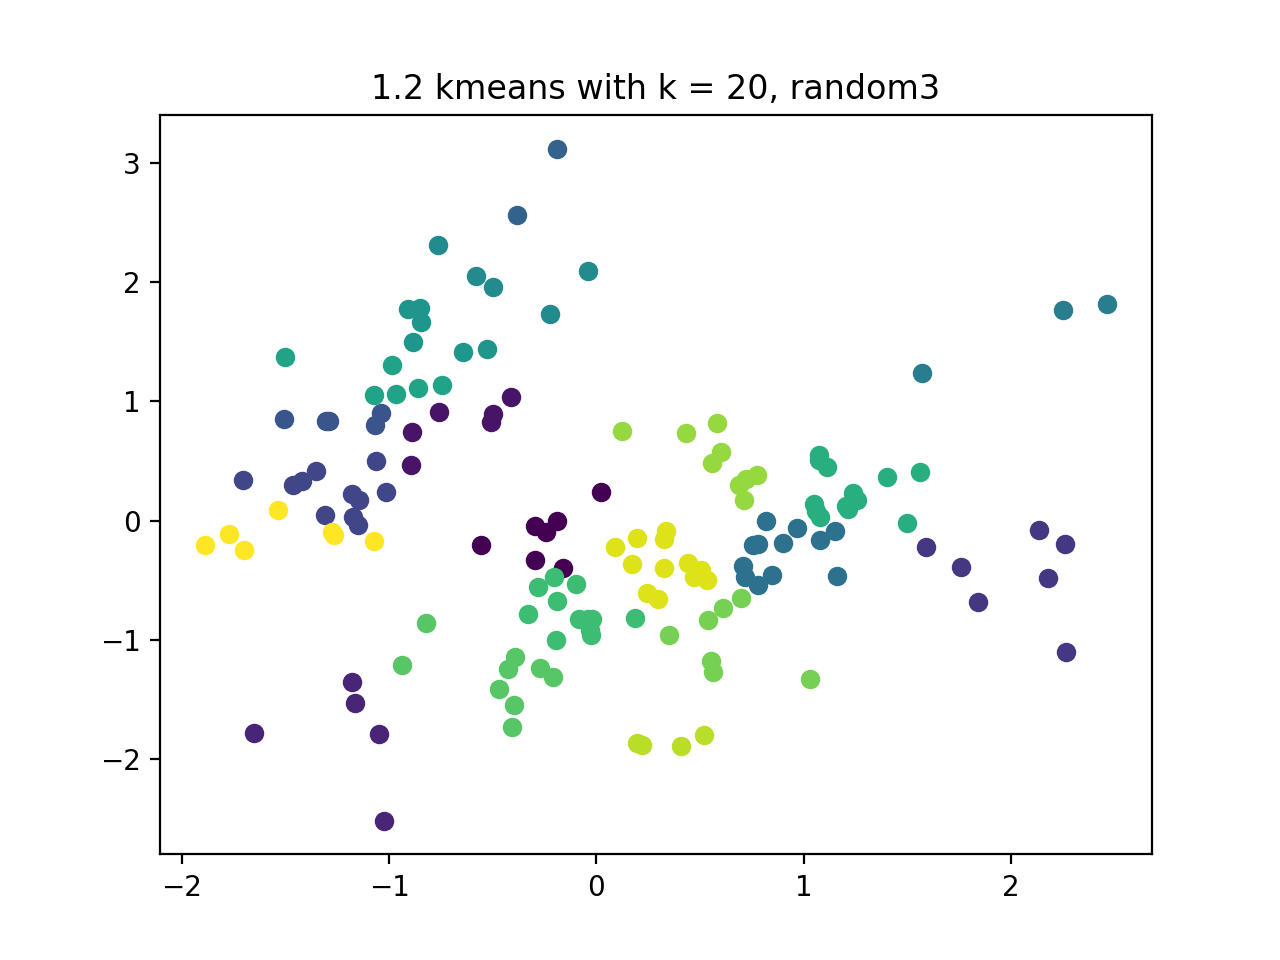

<IPython.core.display.Javascript object>


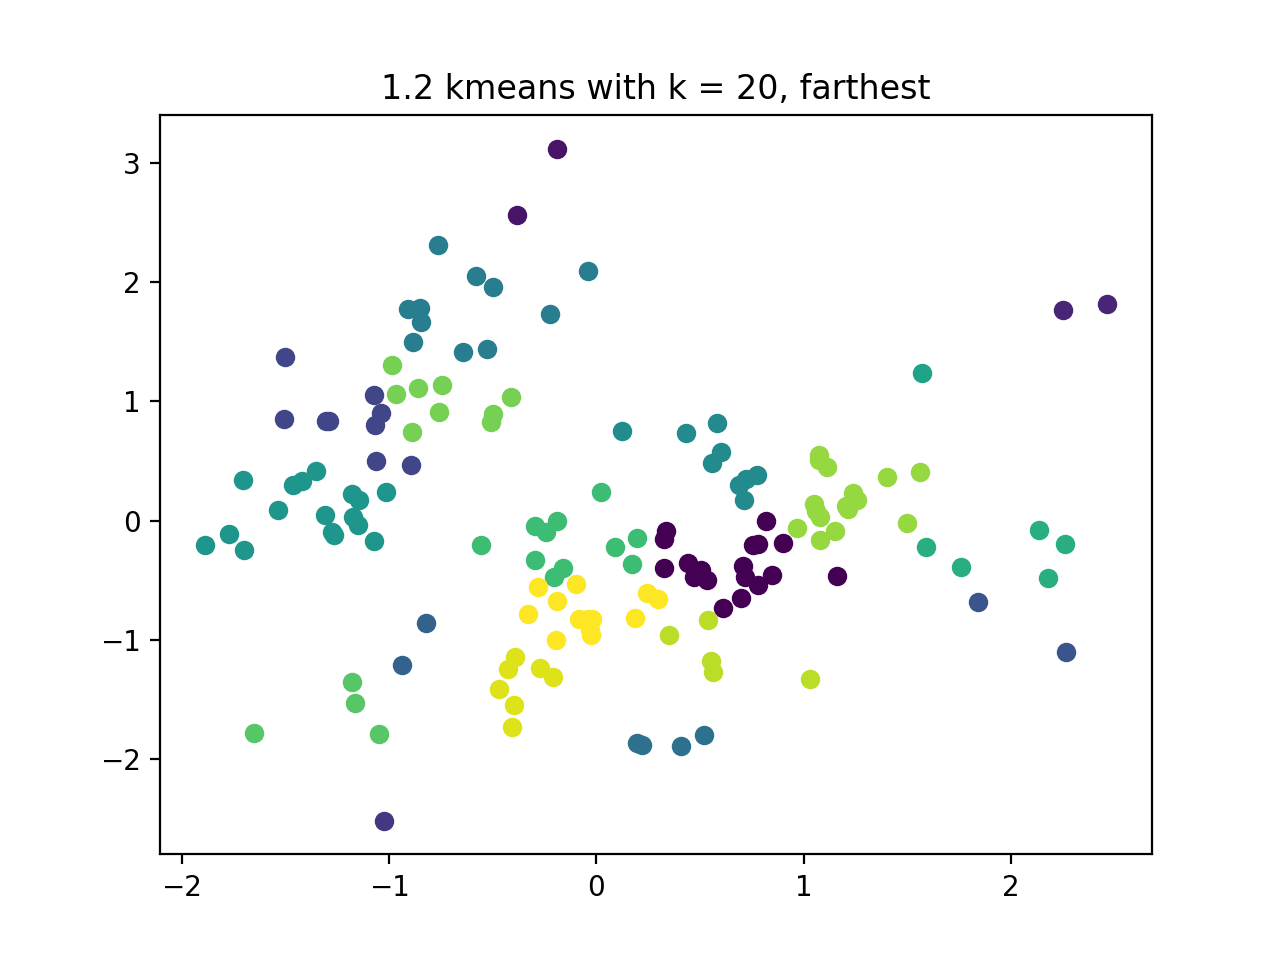

<IPython.core.display.Javascript object>


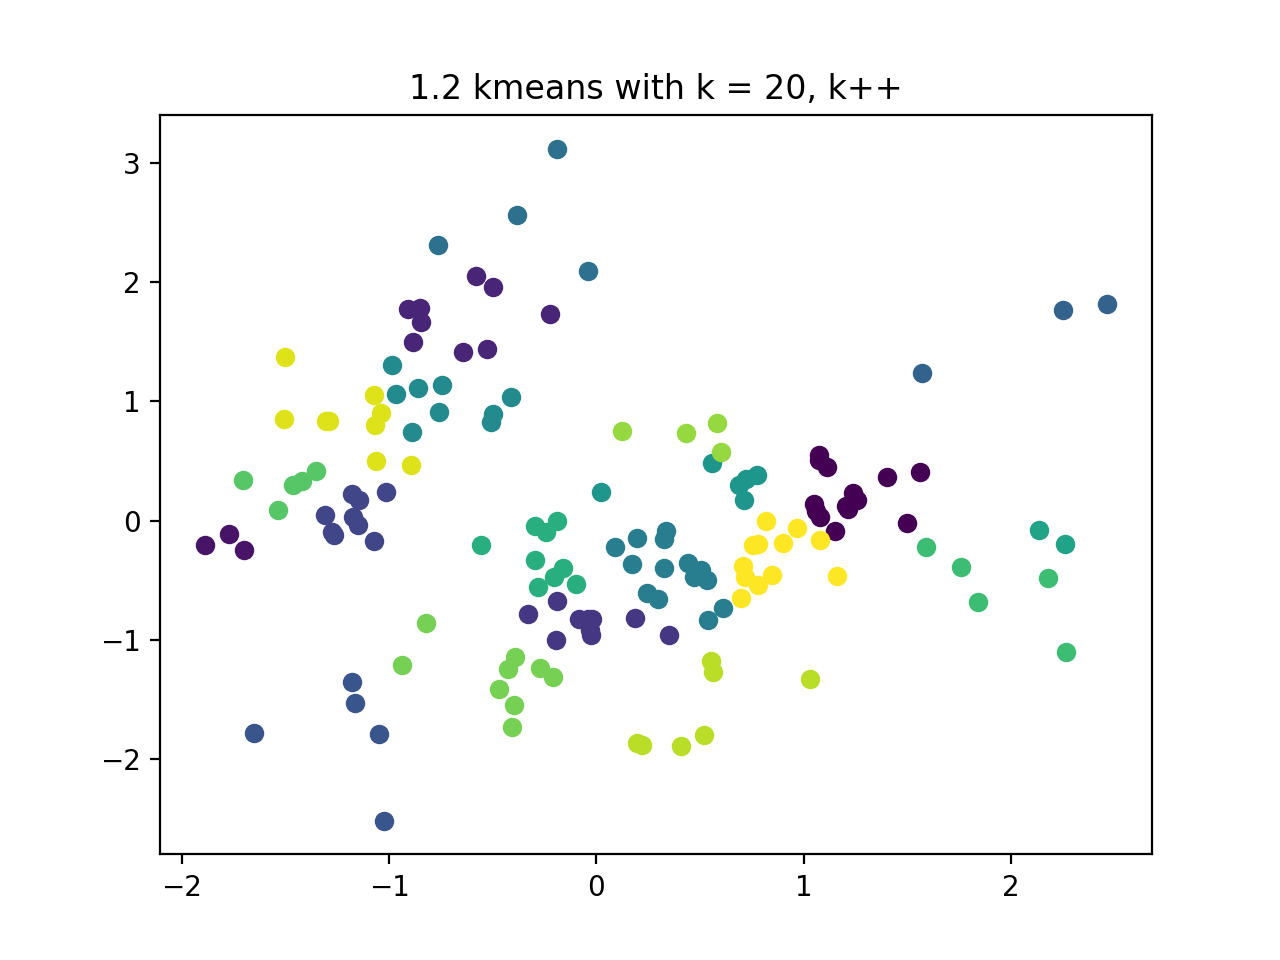

<IPython.core.display.Javascript object>


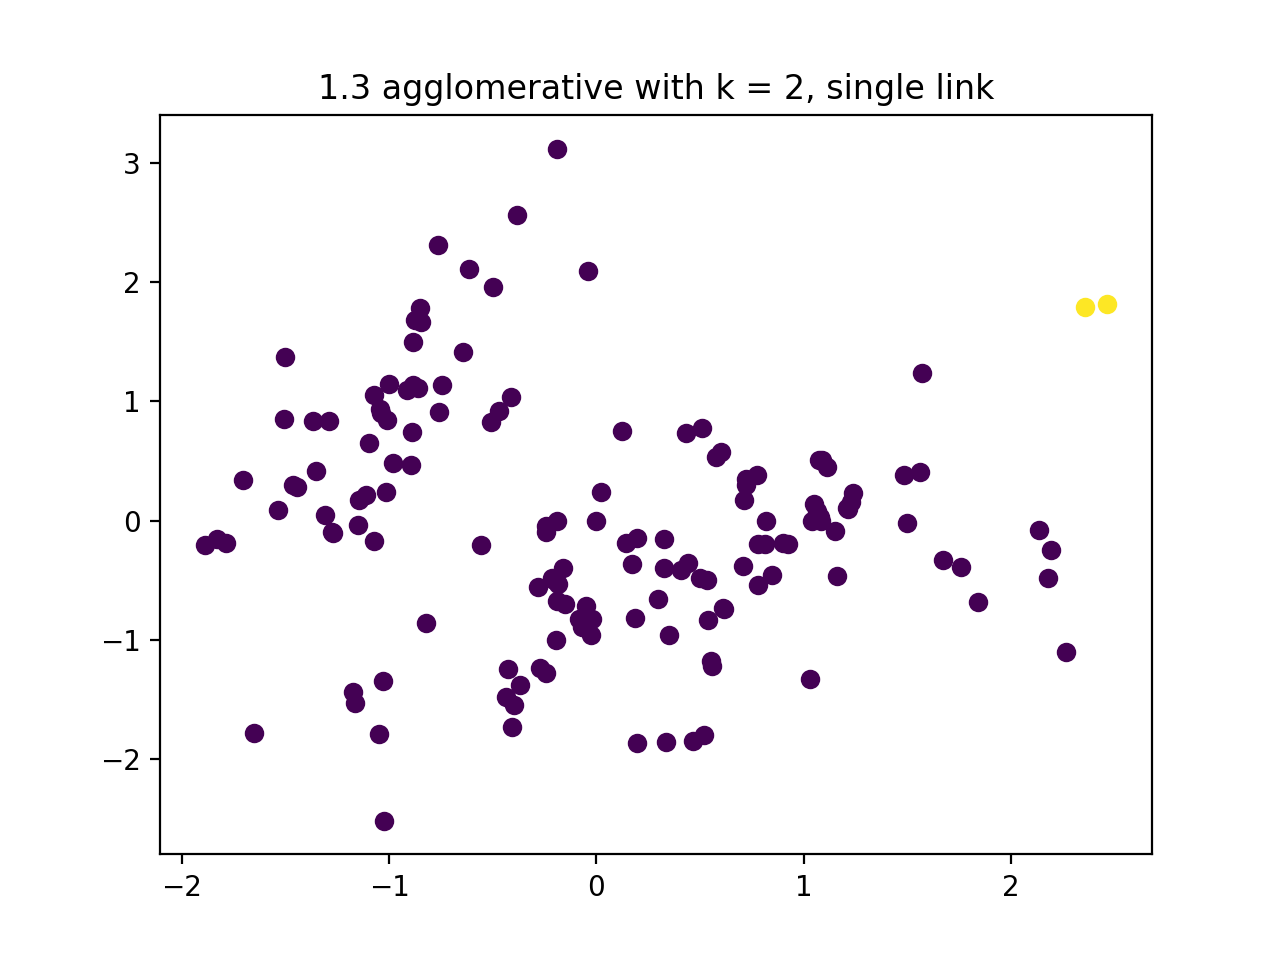

<IPython.core.display.Javascript object>


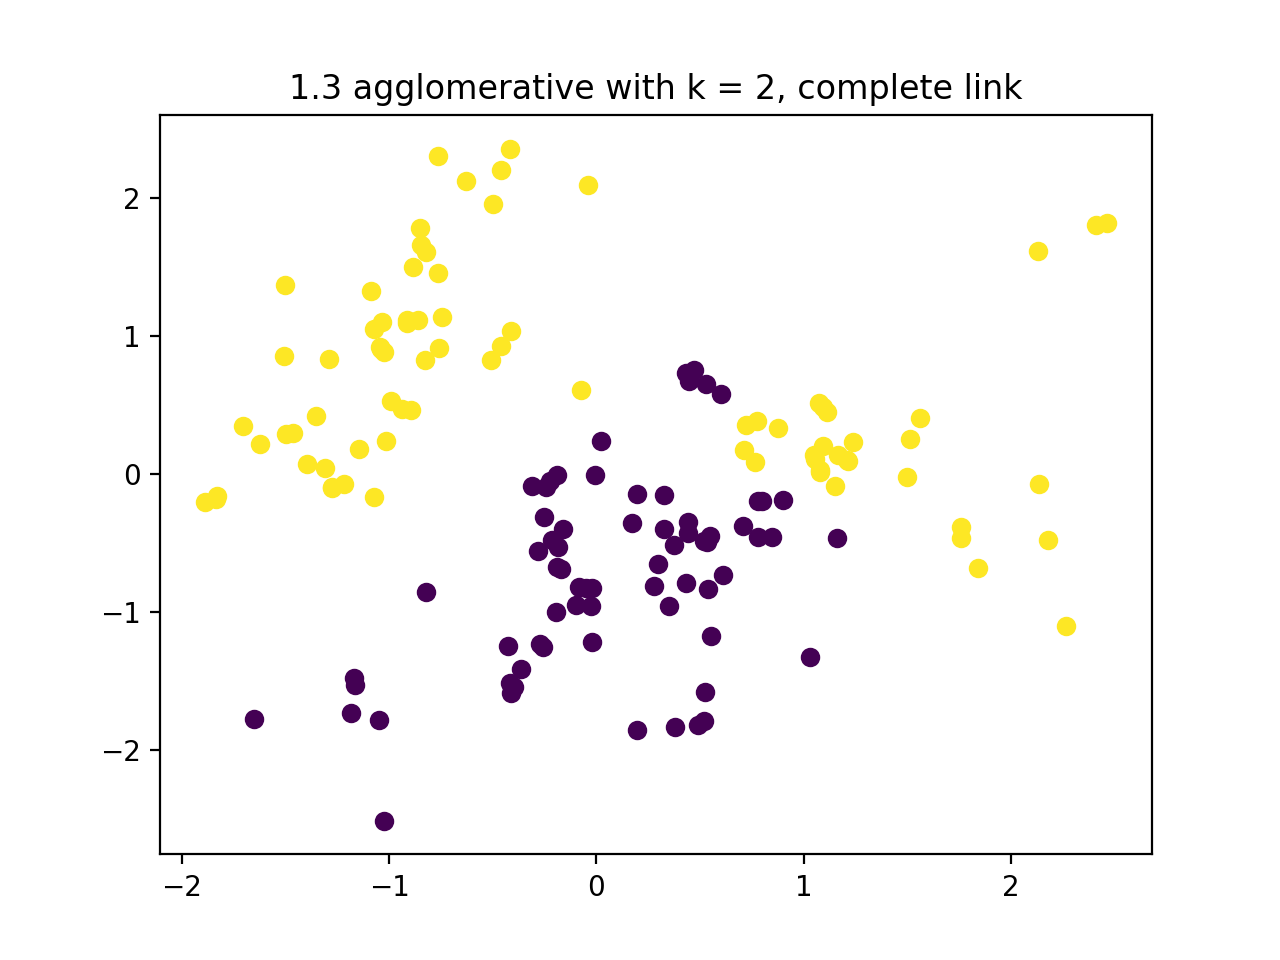

<IPython.core.display.Javascript object>


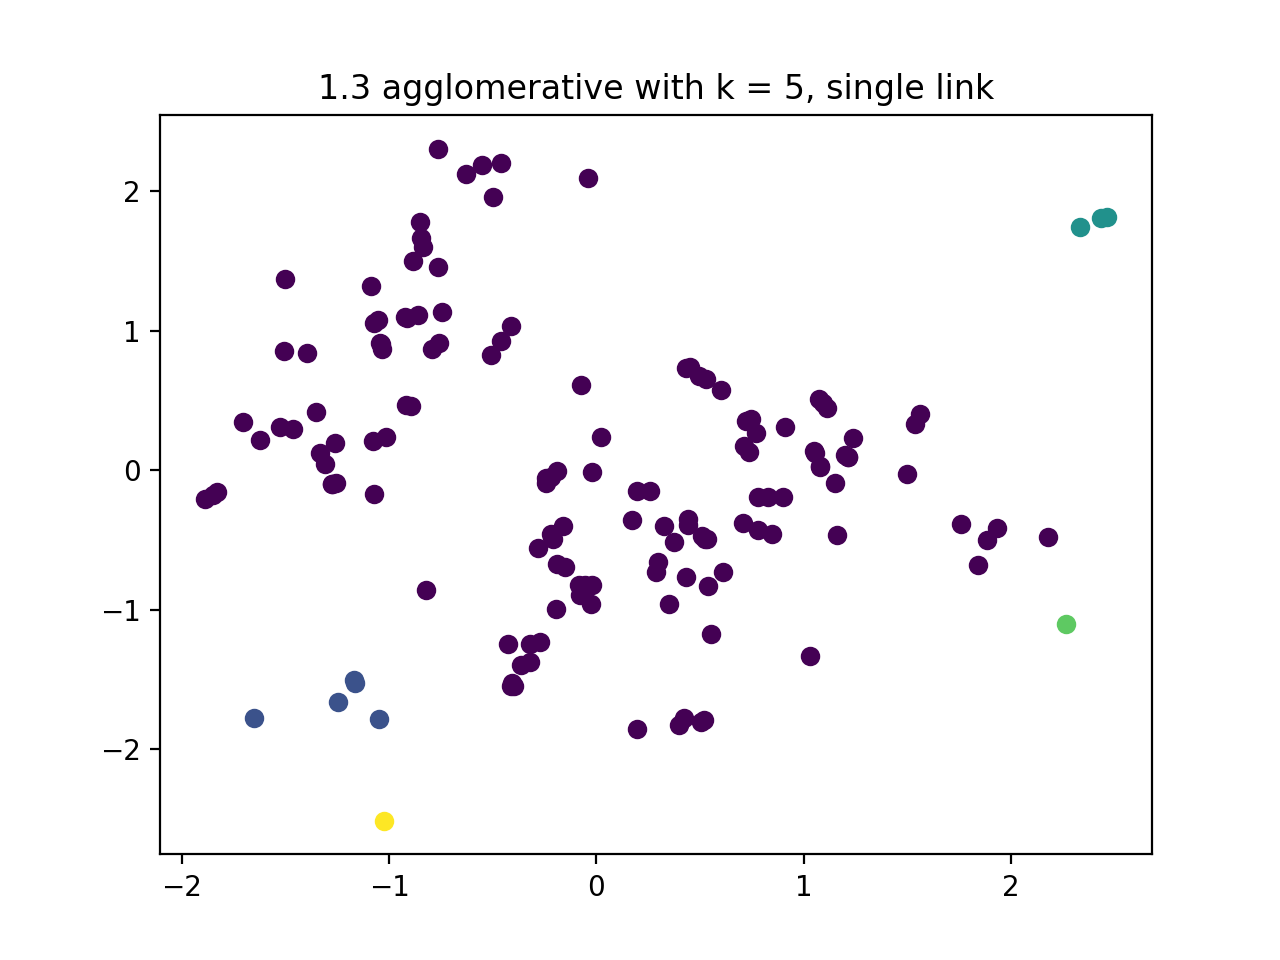

<IPython.core.display.Javascript object>


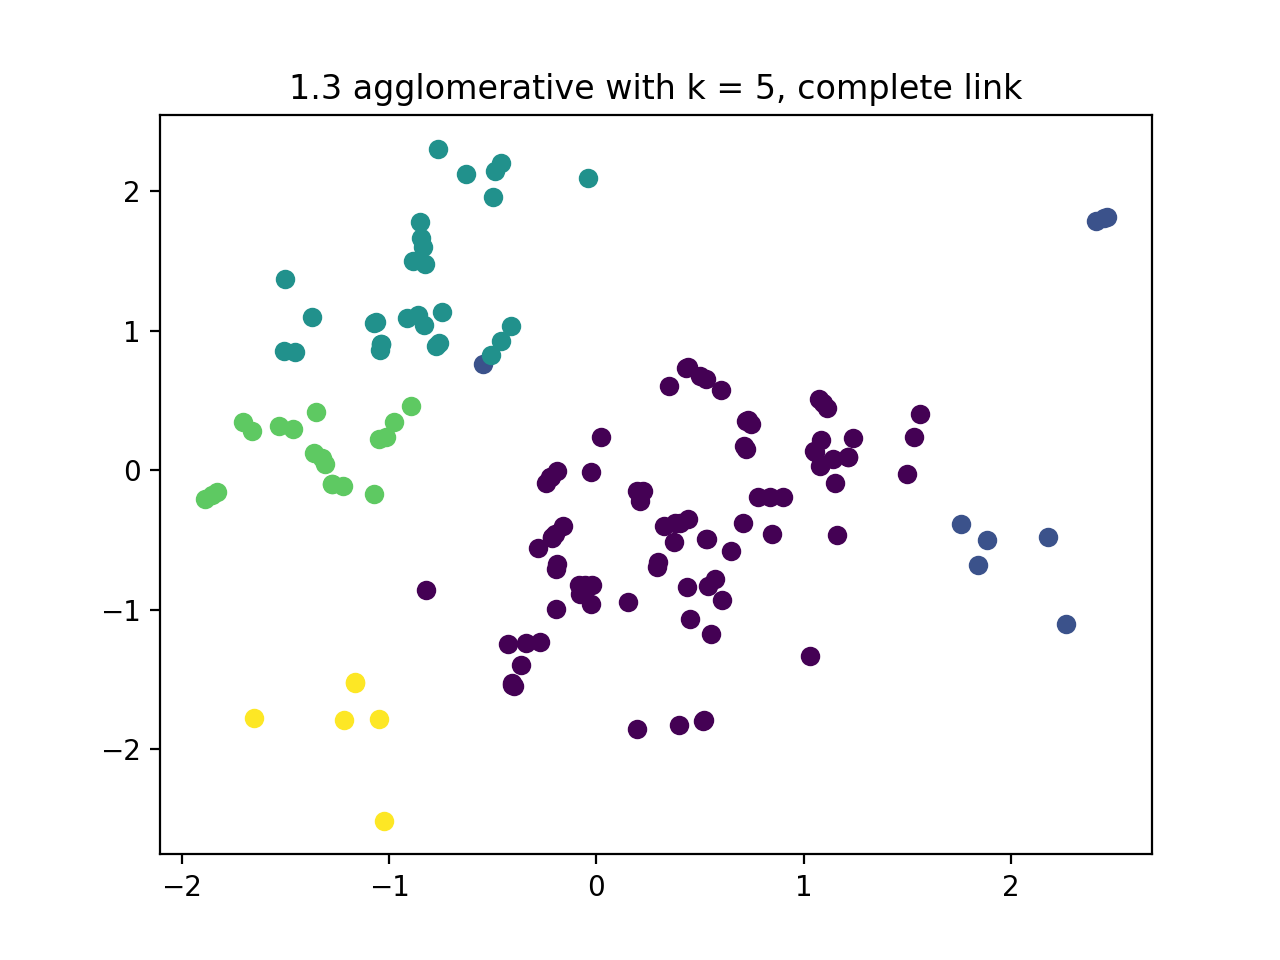

<IPython.core.display.Javascript object>


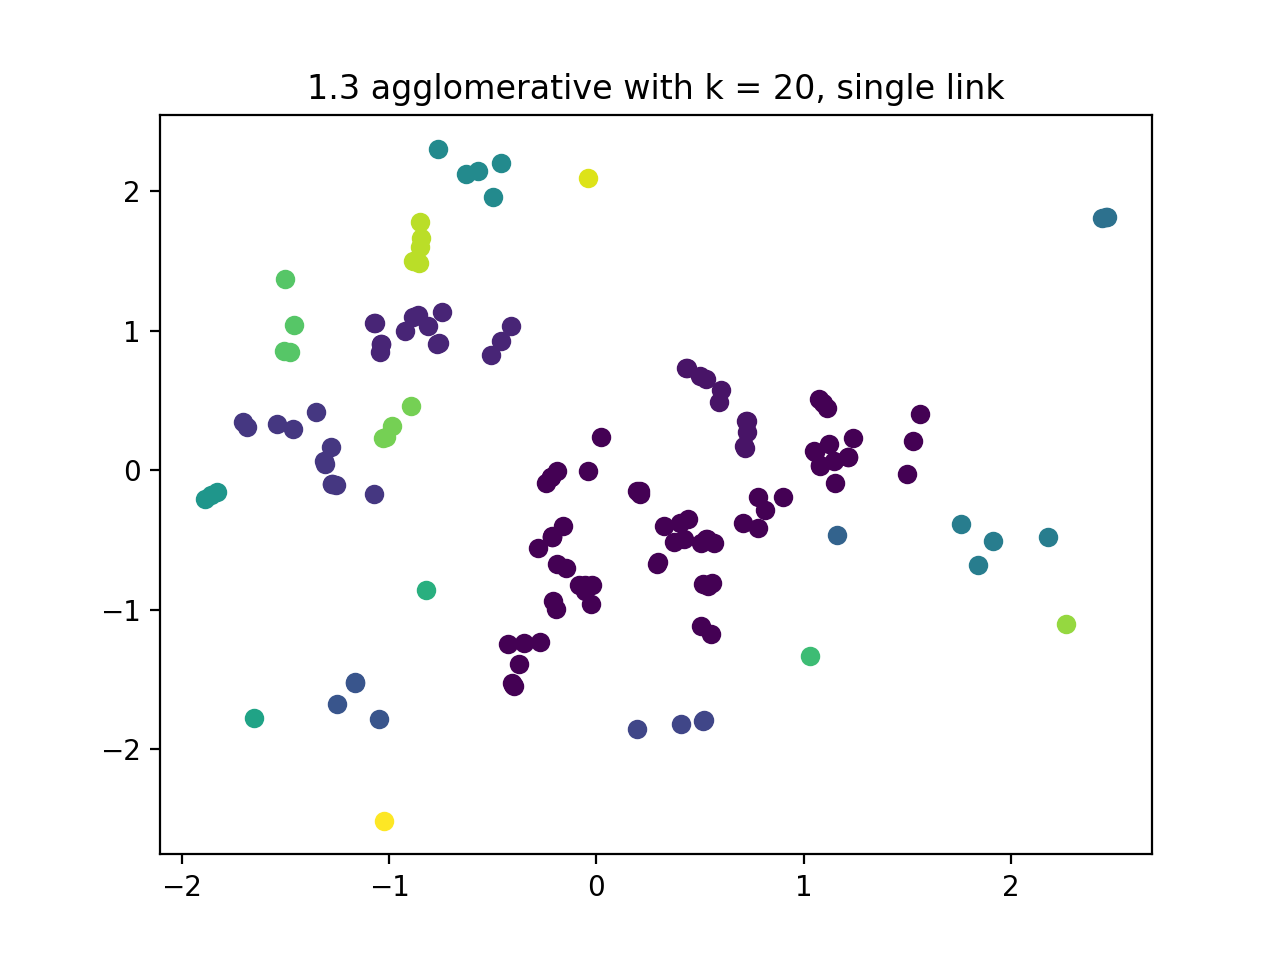

<IPython.core.display.Javascript object>


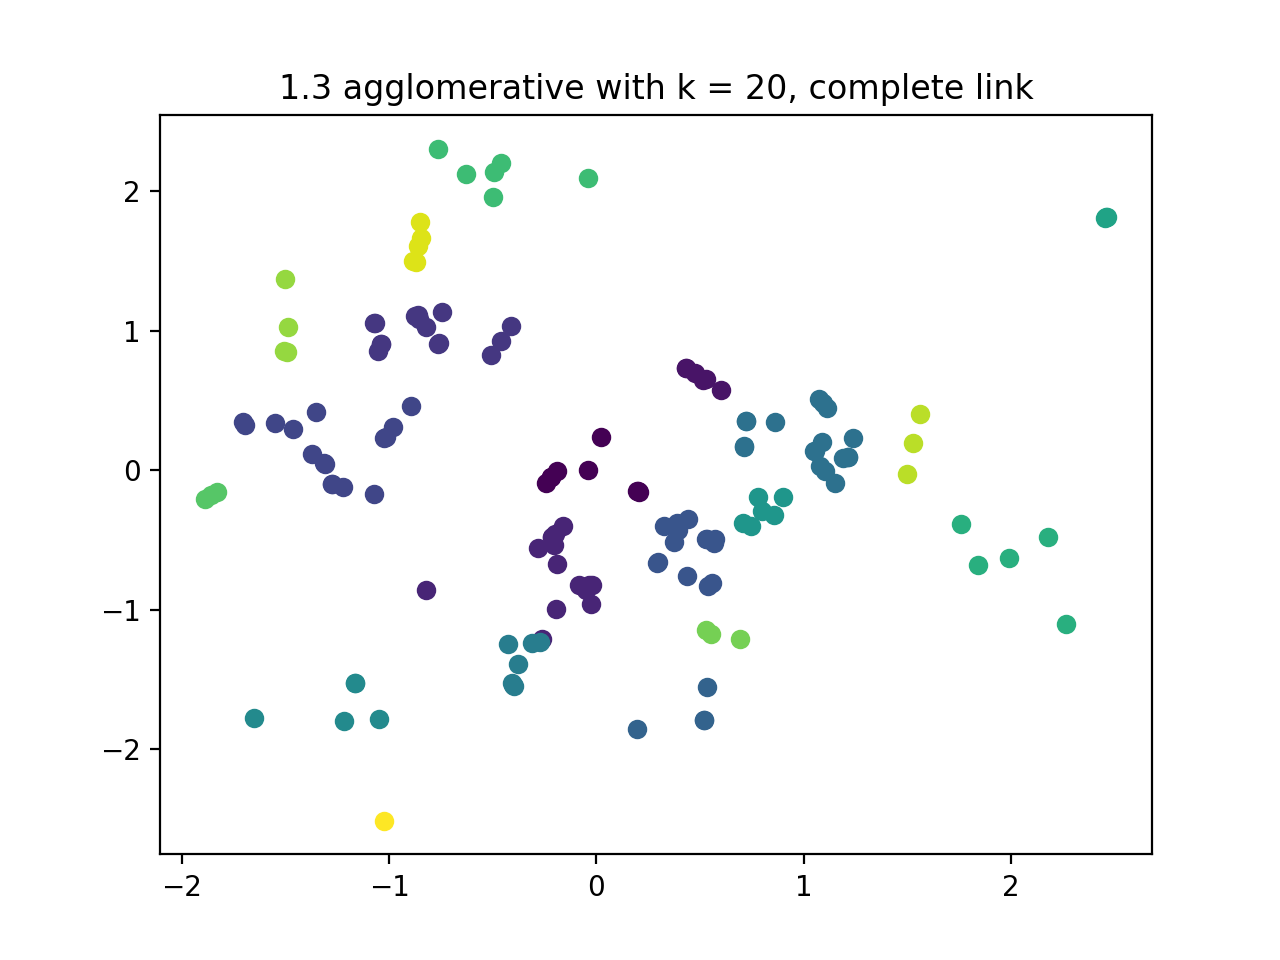

<IPython.core.display.Javascript object>


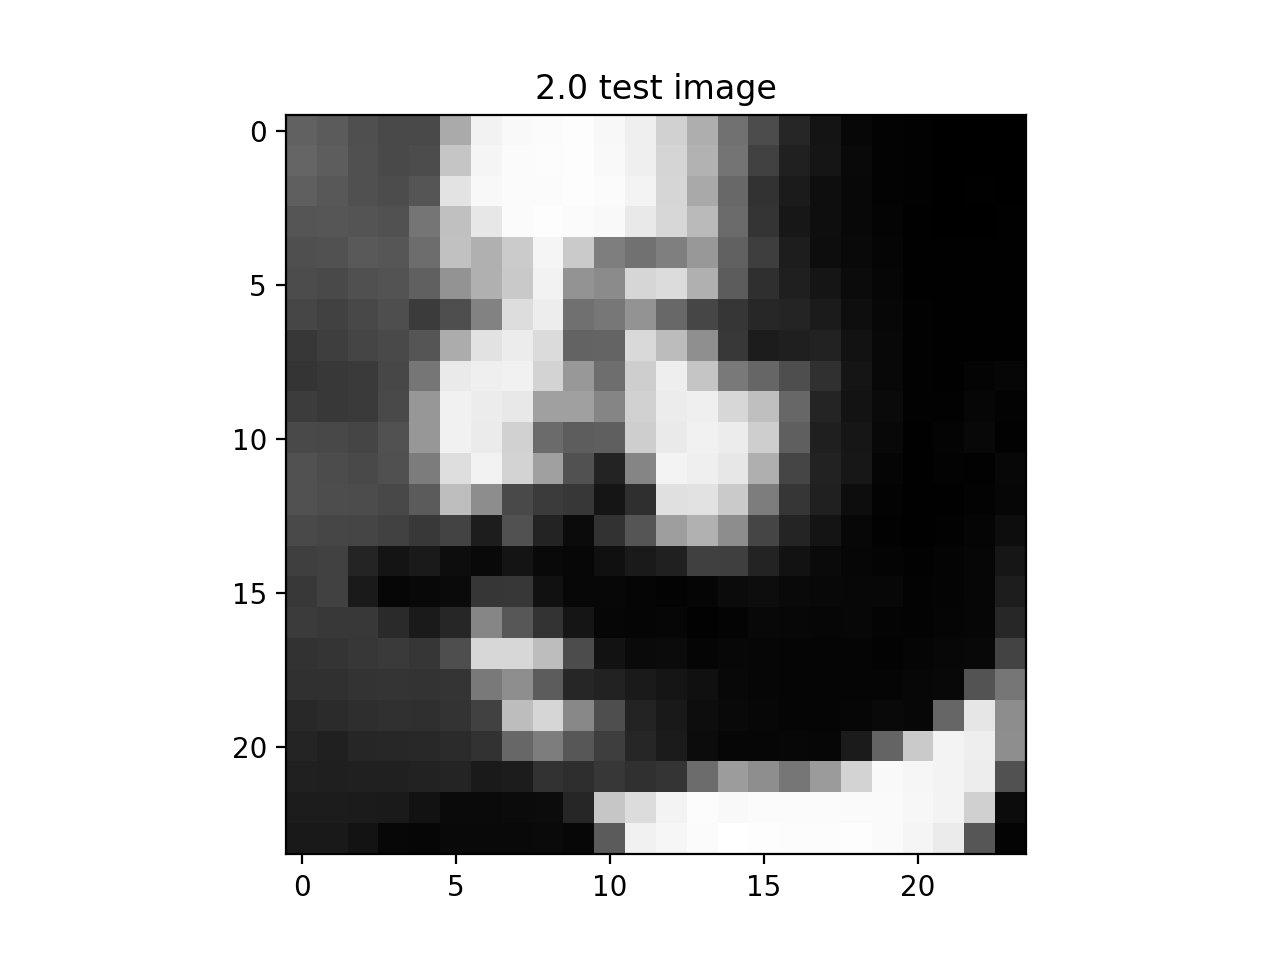

mean:  82.16840277777777


<IPython.core.display.Javascript object>


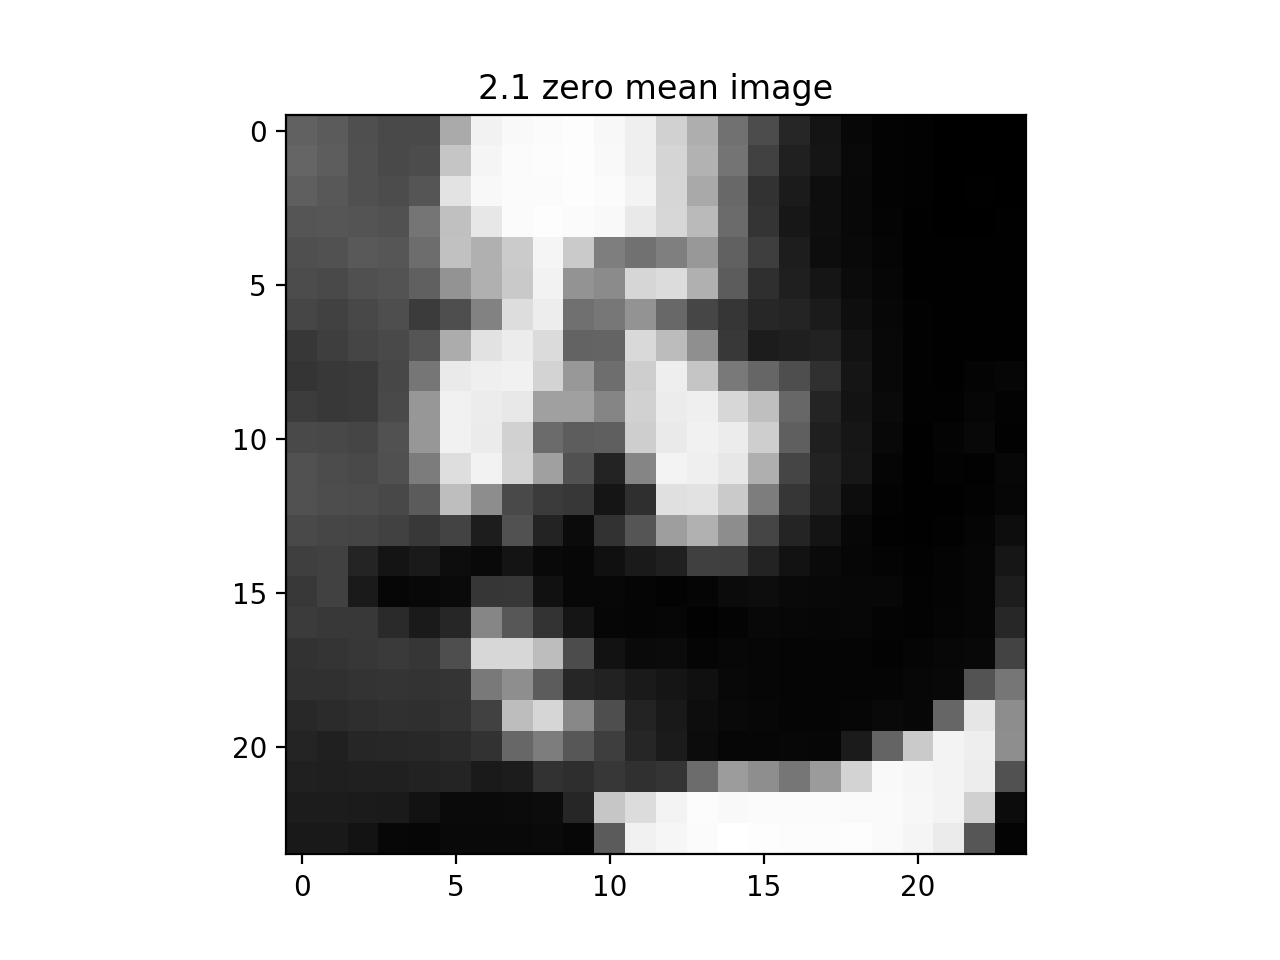

w shape:  (4916, 576) X0 shape:  (4916, 576)


<IPython.core.display.Javascript object>


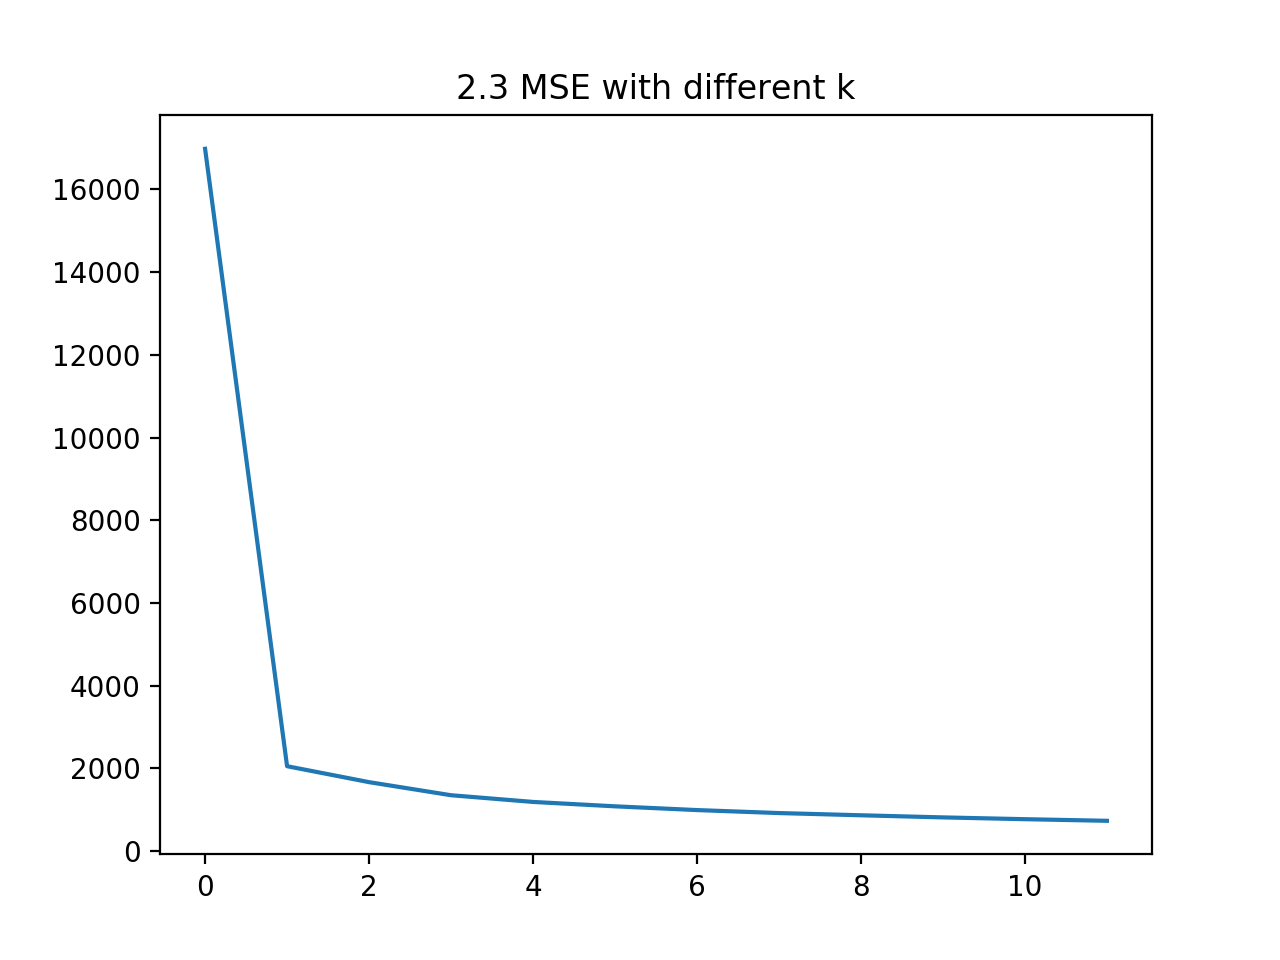

In [39]:
%matplotlib notebook
#%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import linalg

plt.rcParams.update({'figure.max_open_warning': 0})

# 1.1 begin
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]  # get first two features & target
X, Y = ml.shuffleData(X,Y)  # reorder randomly (important later)
X,_ = ml.transforms.rescale(X)  # works much better on rescaled data
plt.figure('1.1 Scattered data points for X')
plt.title('1.1 Scattered data points for X')
plt.scatter(X[:,:1], X[:,1:], color = 'r')
# 1.1 done

# 1.2 begin
K = [2,5,20]
for k in K:
    for i in range(5):
        # try 3 random then farthest and k++
        if i==0:
            z, c, sumd = ml.cluster.kmeans(X, k)
            plt.figure('1.2 kmeans with k = '+str(k)+', random1')
            plt.title('1.2 kmeans with k = '+str(k)+', random1')
        elif i==1:
            z, c, sumd  = ml.cluster.kmeans(X, k)
            plt.figure('1.2 kmeans with k = '+str(k)+', random2')
            plt.title('1.2 kmeans with k = '+str(k)+', random2')
        elif i==2:
            z, c, sumd  = ml.cluster.kmeans(X, k)
            plt.figure('1.2 kmeans with k = '+str(k)+', random3')
            plt.title('1.2 kmeans with k = '+str(k)+', random3')
        elif i==3:
            z, c, sumd  = ml.cluster.kmeans(X, k, init='farthest')
            plt.figure('1.2 kmeans with k = '+str(k)+', farthest')
            plt.title('1.2 kmeans with k = '+str(k)+', farthest')
        else:
            z, c, sumd  = ml.cluster.kmeans(X, k, init='k++')
            plt.figure('1.2 kmeans with k = '+str(k)+', k++')
            plt.title('1.2 kmeans with k = '+str(k)+', k++')
        ml.plotClassify2D(None, X, z)
# 1.2 done

# 1.3 begin
for k in K:
    for i in range(2):
        if i==0:
            z, join = ml.cluster.agglomerative(X, k, method='min')
            plt.figure('1.3 agglomerative with k = '+str(k) + ', single link')
            plt.title('1.3 agglomerative with k = '+str(k) + ', single link')
        else:
            z, join = ml.cluster.agglomerative(X, k, method='max')
            plt.figure('1.3 agglomerative with k = '+str(k) + ', complete link')
            plt.title('1.3 agglomerative with k = '+str(k) + ', complete link')
        ml.plotClassify2D(None, X, z)
# 1.3 done

# 2.1 begin
X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset
# pick a data point i for display
img = np.reshape(X[0,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.figure('2.0 test image')
plt.title('2.0 test image')
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
mean_val = img.mean()
print('mean: ', mean_val)
for i in range(len(img)):
    for j in range(len(img[0])):
        img[i][j] -= mean_val
        #if img[i][j] < 0:
        #    img[i][j] = 0
'''
for y in img:
    for x in y:
        print('last: ', x)
'''
plt.figure('2.1 zero mean image')
plt.title('2.1 zero mean image')
plt.imshow( img.T , cmap="gray") # display image patch; you may have to squint
# 2.1 done

# 2.2 begin
u, s, vh = scipy.linalg.svd(X, full_matrices=False)
w = u.dot(np.diag(s))
X0 = w.dot(vh)
print('w shape: ', w.shape, 'X0 shape: ', X0.shape)
# 2.2 done

# 2.3 begin
MSEs = []
Ks = []
for k in range(12):
    X0_bar = w[:,:k].dot(vh[:k,:])
    mse = np.mean((X0 - X0_bar)**2)
    MSEs.append(mse)
    Ks.append(k)
plt.figure('2.3 MSE with different k')
plt.title('2.3 MSE with different k')
plt.plot(Ks, MSEs)
# 2.3 done

# 2.4 begin





